In [1]:

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

source https://www.kaggle.com/datasets/qualidea1217/valorant-pro-matches-since-april-2021/

name: str
team: str  # might be different for the same team
agent: str
rating: float https://www.vlr.gg/160667/vlr-gg-player-rating-explained
acs: int  # average combat score
k: int  # kills
d: int  # deaths
a: int  # assists
tkmd: int  # total kills minus deaths
kast: float  # kill, assist, survive, trade %
adr: int  # average damage per round
hs: float  # headshot %
fk: int  # first kills
fd: int  # first deaths
fkmd: int  # first kills minus first deaths
t # attack side
ct # defend side

# fix corrupt data

manually edited ACS values over 1,000

In [2]:
%%perl -eat # skip cell

df = pd.read_csv('./data.csv', header=0, index_col=[0], encoding='latin-1')
df['team2-score'] = df['team2-score'].apply(pd.to_numeric, errors='coerce')
df = df[df['team2-score'].notnull()]
print(df.head())

df.to_csv('./data_cleaned.csv')

Couldn't find program: 'perl'


# check data

In [3]:
df = pd.read_csv('./data_cleaned.csv', header=0, index_col=[0], encoding='latin-1')
df.shape

(249460, 46)

In [4]:
df.head(10)

,match-datetime,patch,map,team1,team2,team1-score,team2-score,player-name,player-team,agent,...,hs-ct,fk,fk-t,fk-ct,fd,fd-t,fd-ct,fkmd,fkmd-t,fkmd-ct
0,2023/4/16 10:00,6.06,Haven,Impulse GW,EGN Esports,13,6.0,HolyM0Ly,Impulse GW,Killjoy,...,0.26,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
1,2023/4/16 10:00,6.06,Haven,Impulse GW,EGN Esports,13,6.0,Dolfo,Impulse GW,Breach,...,0.38,0.0,0.0,0.0,1.0,1.0,0.0,-1.0,-1.0,0.0
2,2023/4/16 10:00,6.06,Haven,Impulse GW,EGN Esports,13,6.0,zePiCzz,Impulse GW,Astra,...,0.27,2.0,2.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0
3,2023/4/16 10:00,6.06,Haven,Impulse GW,EGN Esports,13,6.0,s2newb,Impulse GW,Neon,...,0.24,7.0,3.0,4.0,5.0,5.0,0.0,2.0,-2.0,4.0
4,2023/4/16 10:00,6.06,Haven,Impulse GW,EGN Esports,13,6.0,Minikid,Impulse GW,Sova,...,0.80,0.0,0.0,0.0,1.0,0.0,1.0,-1.0,0.0,-1.0
5,2023/4/16 10:00,6.06,Haven,Impulse GW,EGN Esports,13,6.0,Phatt,EGN Esports,Breach,...,0.28,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
6,2023/4/16 10:00,6.06,Haven,Impulse GW,EGN Esports,13,6.0,Dext,EGN Esports,Cypher,...,0.52,3.0,0.0,3.0,3.0,2.0,1.0,0.0,-2.0,2.0
7,2023/4/16 10:00,6.06,Haven,Impulse GW,EGN Esports,13,6.0,fainz,EGN Esports,Jett,...,0.43,3.0,2.0,1.0,4.0,2.0,2.0,-1.0,0.0,-1.0
8,2023/4/16 10:00,6.06,Haven,Impulse GW,EGN Esports,13,6.0,al1en,EGN Esports,Omen,...,0.19,1.0,0.0,1.0,3.0,1.0,2.0,-2.0,-1.0,-1.0
9,2023/4/16 10:00,6.06,Haven,Impulse GW,EGN Esports,13,6.0,silenttt,EGN Esports,Sova,...,0.22,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [5]:
df.columns

Index(['match-datetime', 'patch', 'map', 'team1', 'team2', 'team1-score',
       'team2-score', 'player-name', 'player-team', 'agent', 'rating',
       'rating-t', 'rating-ct', 'acs', 'acs-t', 'acs-ct', 'k', 'k-t', 'k-ct',
       'd', 'd-t', 'd-ct', 'a', 'a-t', 'a-ct', 'tkmd', 'tkmd-t', 'tkmd-ct',
       'kast', 'kast-t', 'kast-ct', 'adr', 'adr-t', 'adr-ct', 'hs', 'hs-t',
       'hs-ct', 'fk', 'fk-t', 'fk-ct', 'fd', 'fd-t', 'fd-ct', 'fkmd', 'fkmd-t',
       'fkmd-ct'],
      dtype='object')

# preprocessing

In [6]:
df = pd.read_csv('./data_cleaned.csv', header=0, index_col=[0], encoding='latin-1')
df = df.dropna()
df.shape

(245144, 46)

record wins

In [7]:
df['win'] = ((df['player-team'] == df['team1']) & (df['team1-score'] > df['team2-score'])) | ((df['player-team'] == df['team2']) & (df['team2-score'] > df['team1-score']))
df.sample(10).sort_index()

,match-datetime,patch,map,team1,team2,team1-score,team2-score,player-name,player-team,agent,...,fk,fk-t,fk-ct,fd,fd-t,fd-ct,fkmd,fkmd-t,fkmd-ct,win
31277,2023/1/30 11:00,6.01,Haven,Ramboot Club,Movistar Riders,4,13.0,dimaxx,Movistar Riders,Breach,...,0.0,0.0,0.0,1.0,0.0,1.0,-1.0,0.0,-1.0,True
78147,2022/6/28 19:20,5.00,Haven,Soniqs,Gen.G,13,5.0,rhyme,Gen.G,Raze,...,2.0,1.0,1.0,2.0,2.0,0.0,0.0,-1.0,1.0,False
83017,2022/6/15 23:00,4.10,Fracture,ONIC G,Made in Thailand,13,11.0,Delend,Made in Thailand,Brimstone,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
100846,2022/5/13 18:25,4.08,Bind,Luminosity,Sentinels,13,11.0,Kanpeki,Sentinels,Skye,...,1.0,0.0,1.0,1.0,1.0,0.0,0.0,-1.0,1.0,False
126053,2022/3/11 23:00,4.04,Breeze,Action PH,ONIC G,9,13.0,tesseract,Action PH,Sova,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,False
156613,2022/1/10 19:00,3.12,Breeze,ex-FLICKBAITERS,GunsForHire,13,6.0,supA,ex-FLICKBAITERS,Sova,...,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,True
188073,2021/10/2 1:45,3.06,Breeze,Oasis Gaming,Kingsmen,11,13.0,kurtesy,Oasis Gaming,Sova,...,0.0,0.0,0.0,2.0,2.0,0.0,-2.0,-2.0,0.0,False
195610,2021/8/29 19:50,3.04,Icebox,Complexity,Immortals,11,13.0,jcrueL,Complexity,Jett,...,3.0,2.0,1.0,0.0,0.0,0.0,3.0,2.0,1.0,False
209007,2021/7/26 17:00,3.02,Split,Teal Seam,Fenrir,17,15.0,icy,Fenrir,Viper,...,6.0,4.0,2.0,2.0,1.0,1.0,4.0,3.0,1.0,False
249698,2021/4/14 5:30,2.07,Haven,Kanga Esports,TinyTurtles,13,8.0,Chilean El Dios,TinyTurtles,Raze,...,0.0,0.0,0.0,3.0,1.0,2.0,-3.0,-1.0,-2.0,False


isolate feature set

In [8]:
feature_set = ['patch', 'map', 'player-name', 'agent', 'rating-t', 'rating-ct', 'acs-t', 'acs-ct', 'k-t', 'k-ct',
       'd-t', 'd-ct', 'a-t', 'a-ct', 'tkmd-t', 'tkmd-ct', 'kast-t', 'kast-ct', 'adr', 'adr-t', 'adr-ct', 'hs', 'fk-t', 'fk-ct', 'fd-t', 'fd-ct', 'fkmd-t', 'fkmd-ct']

df = df[feature_set + ['win']]
df.head()

,patch,map,player-name,agent,rating-t,rating-ct,acs-t,acs-ct,k-t,k-ct,...,adr-t,adr-ct,hs,fk-t,fk-ct,fd-t,fd-ct,fkmd-t,fkmd-ct,win
0,6.06,Haven,HolyM0Ly,Killjoy,1.21,1.51,239.0,316.0,11.0,9.0,...,141.0,193.0,0.31,0.0,1.0,0.0,1.0,0.0,0.0,True
1,6.06,Haven,Dolfo,Breach,1.21,1.24,256.0,212.0,12.0,4.0,...,183.0,115.0,0.41,0.0,0.0,1.0,0.0,-1.0,0.0,True
2,6.06,Haven,zePiCzz,Astra,1.14,1.13,243.0,133.0,9.0,3.0,...,168.0,114.0,0.33,2.0,0.0,1.0,0.0,1.0,0.0,True
3,6.06,Haven,s2newb,Neon,0.35,2.29,174.0,428.0,8.0,10.0,...,107.0,244.0,0.27,3.0,4.0,5.0,0.0,-2.0,4.0,True
4,6.06,Haven,Minikid,Sova,0.51,1.31,95.0,124.0,4.0,4.0,...,56.0,77.0,0.39,0.0,0.0,0.0,1.0,0.0,-1.0,True


encode categorical variables

In [9]:
from sklearn.preprocessing import LabelEncoder

for col in ['map', 'player-name', 'agent']:
    le = LabelEncoder()
    le.fit(df[col].unique())
    df[col] = le.transform(df[col])
df.sample(10).sort_index()

,patch,map,player-name,agent,rating-t,rating-ct,acs-t,acs-ct,k-t,k-ct,...,adr-t,adr-ct,hs,fk-t,fk-ct,fd-t,fd-ct,fkmd-t,fkmd-ct,win
36058,5.12,1,2858,16,0.35,1.16,88.0,208.0,3.0,3.0,...,63.0,129.0,0.19,0.0,0.0,2.0,0.0,-2.0,0.0,False
41983,5.12,4,2756,10,0.48,1.29,134.0,291.0,3.0,12.0,...,89.0,205.0,0.21,0.0,1.0,0.0,2.0,0.0,-1.0,True
51935,5.10,5,433,5,1.01,1.31,185.0,285.0,8.0,13.0,...,135.0,194.0,0.35,1.0,0.0,0.0,0.0,1.0,0.0,True
64861,5.05,4,4397,5,1.11,1.79,203.0,391.0,9.0,7.0,...,118.0,205.0,0.22,1.0,1.0,1.0,0.0,0.0,1.0,True
81756,4.11,1,5405,14,1.34,1.55,223.0,337.0,4.0,14.0,...,119.0,204.0,0.26,1.0,3.0,0.0,1.0,1.0,2.0,True
113682,4.07,5,2570,18,1.02,1.07,122.0,249.0,2.0,10.0,...,86.0,150.0,0.30,1.0,2.0,0.0,0.0,1.0,2.0,True
141292,4.01,2,6881,9,1.42,1.05,239.0,185.0,4.0,8.0,...,207.0,143.0,0.23,0.0,0.0,0.0,3.0,0.0,-3.0,True
148699,3.12,4,7335,18,1.10,0.26,147.0,16.0,4.0,1.0,...,88.0,7.0,0.44,0.0,0.0,0.0,0.0,0.0,0.0,False
178475,3.08,4,6843,10,1.35,0.86,271.0,192.0,14.0,9.0,...,173.0,116.0,0.18,0.0,0.0,1.0,3.0,-1.0,-3.0,False
214274,3.01,4,4431,16,0.57,0.03,76.0,65.0,3.0,1.0,...,59.0,36.0,0.18,0.0,0.0,2.0,1.0,-2.0,-1.0,False


correlation

In [10]:
df.corr()

,patch,map,player-name,agent,rating-t,rating-ct,acs-t,acs-ct,k-t,k-ct,...,adr-t,adr-ct,hs,fk-t,fk-ct,fd-t,fd-ct,fkmd-t,fkmd-ct,win
patch,1.000000,0.097374,-0.005635,-0.118753,0.020148,0.011683,0.001824,-0.009005,0.004464,-0.004644,...,0.039420,0.027875,0.083004,0.000993,0.002477,0.003334,0.001786,-0.001927,0.000757,-0.000512
map,0.097374,1.000000,0.001144,-0.001165,0.012768,-0.016383,0.020155,0.000673,0.022687,0.001798,...,0.023677,0.002460,-0.005845,0.008344,-0.003054,-0.002888,0.009216,0.008568,-0.008560,0.000109
player-name,-0.005635,0.001144,1.000000,0.002078,0.011412,0.017919,0.013856,0.014233,0.011648,0.017286,...,0.011846,0.012766,0.012915,0.014662,0.010788,0.006869,-0.000208,0.005485,0.008628,0.017852
agent,-0.118753,-0.001165,0.002078,1.000000,0.003881,-0.006470,-0.001339,0.011901,-0.015290,-0.021243,...,0.006707,0.032555,-0.037071,-0.034159,-0.059234,-0.019424,-0.007313,-0.010039,-0.041729,0.004766
rating-t,0.020148,0.012768,0.011412,0.003881,1.000000,0.186292,0.820977,0.114139,0.649609,0.081372,...,0.787159,0.108756,0.125341,0.279971,0.047333,-0.298669,-0.044112,0.449150,0.066716,0.428245
rating-ct,0.011683,-0.016383,0.017919,-0.006470,0.186292,1.000000,0.140257,0.818931,0.096027,0.662942,...,0.135306,0.780803,0.091256,0.074179,0.326768,-0.010999,-0.293943,0.064411,0.453507,0.429717
acs-t,0.001824,0.020155,0.013856,-0.001339,0.820977,0.140257,1.000000,0.144315,0.749280,0.111011,...,0.938356,0.136980,0.120447,0.417218,0.129953,-0.141960,0.031435,0.426459,0.081267,0.247331
acs-ct,-0.009005,0.000673,0.014233,0.011901,0.114139,0.818931,0.144315,1.000000,0.101867,0.741040,...,0.140553,0.932982,0.088083,0.129773,0.431306,0.069532,-0.180929,0.041556,0.460277,0.226822
k-t,0.004464,0.022687,0.011648,-0.015290,0.649609,0.096027,0.749280,0.101867,1.000000,-0.007690,...,0.756393,0.075101,0.138799,0.473763,0.049951,0.004369,0.001616,0.351596,0.038229,0.222874
k-ct,-0.004644,0.001798,0.017286,-0.021243,0.081372,0.662942,0.111011,0.741040,-0.007690,1.000000,...,0.085104,0.740415,0.085025,0.059638,0.509420,0.035343,-0.027252,0.016382,0.419090,0.209595


In [11]:
%%perl -eat # skip cell

sns.pairplot(df[feature_set].drop(['map', 'player-name', 'agent'], axis=1))

Couldn't find program: 'perl'


# model

In [12]:
from sklearn.model_selection import train_test_split

X = df.drop('win', axis=1)
y = df['win']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
n = len(X.columns)

models = {}

## Neural Network

In [13]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(n+1,n//2), alpha=.0001, learning_rate='adaptive', max_iter=1000, tol=.0001, random_state=42).fit(X_train, y_train)
models['Neural Network'] = clf

In [14]:
print('Train Accuracy:', clf.score(X_train, y_train))
print('Test Accuracy:',clf.score(X_test, y_test))
print('Features:', clf.n_features_in_)
print('Output Activation Function:', clf.out_activation_)
print('Iterations:', clf.n_iter_)
print('Samples Seen:', clf.t_)
clf.get_params()

Train Accuracy: 0.818827573453426
Test Accuracy: 0.8191756681787031
Features: 28
Output Activation Function: logistic
Iterations: 125
Samples Seen: 22982250


{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (29, 14),
 'learning_rate': 'adaptive',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 1000,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 42,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [97]:
print('Train Accuracy:', clf.score(X_train, y_train))
print('Test Accuracy:',clf.score(X_test, y_test))

Train Accuracy: 0.818827573453426
Test Accuracy: 0.8191756681787031


## Random Forest

In [15]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=3, random_state=42).fit(X_train, y_train)
models['Random Forest'] = clf

In [18]:
print('Train Accuracy:', clf.score(X_train, y_train))
print('Test Accuracy:',clf.score(X_test, y_test))
print('Features:', clf.n_features_in_)
clf.get_params()

Train Accuracy: 0.7758324359016198
Test Accuracy: 0.7752667819730444
Features: 28


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 3,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [26]:
print(np.dstack((X.columns, clf.feature_importances_)))

[[['patch' 0.0]
  ['map' 0.0]
  ['player-name' 0.0]
  ['agent' 0.0]
  ['rating-t' 0.14841233824952318]
  ['rating-ct' 0.17003713862428552]
  ['acs-t' 0.013501311008118395]
  ['acs-ct' 0.005107809661160134]
  ['k-t' 0.009569400208623667]
  ['k-ct' 0.011392267681296265]
  ['d-t' 0.07830256718935784]
  ['d-ct' 0.078348741586447]
  ['a-t' 0.0027828545820385436]
  ['a-ct' 0.0009505301594983775]
  ['tkmd-t' 0.14184946586757569]
  ['tkmd-ct' 0.11834541551848243]
  ['kast-t' 0.0833439929840985]
  ['kast-ct' 0.10177960857357664]
  ['adr' 0.021722090117920655]
  ['adr-t' 0.003613836538311377]
  ['adr-ct' 0.0043082311377718235]
  ['hs' 0.0]
  ['fk-t' 0.0002660991601645873]
  ['fk-ct' 0.0]
  ['fd-t' 0.0]
  ['fd-ct' 0.0018098057000964715]
  ['fkmd-t' 0.0011606067015572932]
  ['fkmd-ct' 0.0033958887500958094]]]


In [99]:
print('Train Accuracy:', clf.score(X_train, y_train))
print('Test Accuracy:',clf.score(X_test, y_test))

Train Accuracy: 0.7758324359016198
Test Accuracy: 0.7752667819730444


observe 1 tree in the forest

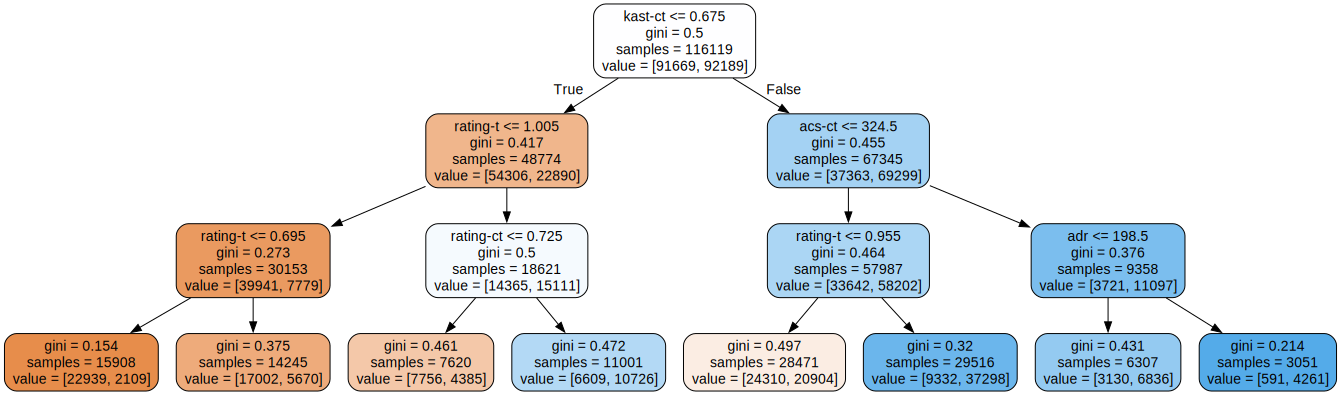

In [101]:
from sklearn.tree import export_graphviz
from graphviz import Source
from IPython.display import SVG

graph = Source(export_graphviz(clf.estimators_[0], out_file=None, feature_names=X.columns, filled=True, rounded=True))
SVG(graph.pipe(format='svg'))

results

In [71]:
%%perl -eat # skip cell

from sklearn.model_selection import cross_val_score

c = cross_val_score(clf, X, y, cv=5)
print('Cross Validation Accuracy:', c)

Couldn't find program: 'perl'


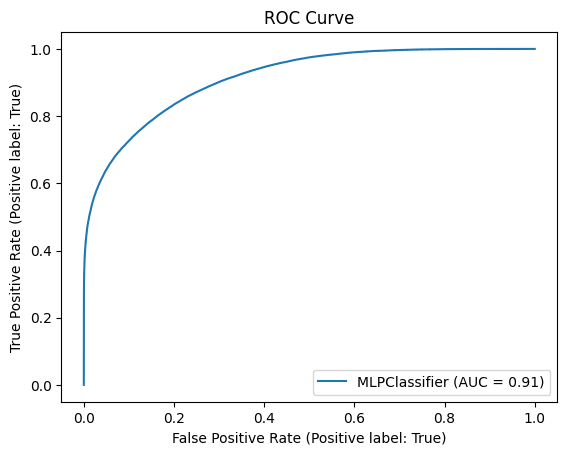

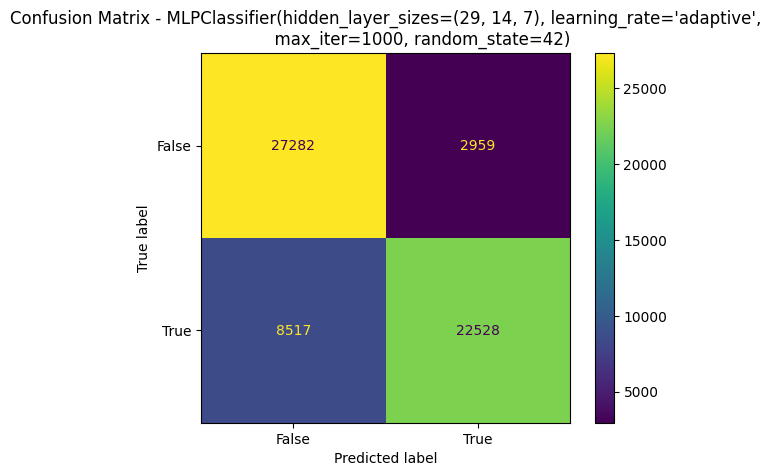

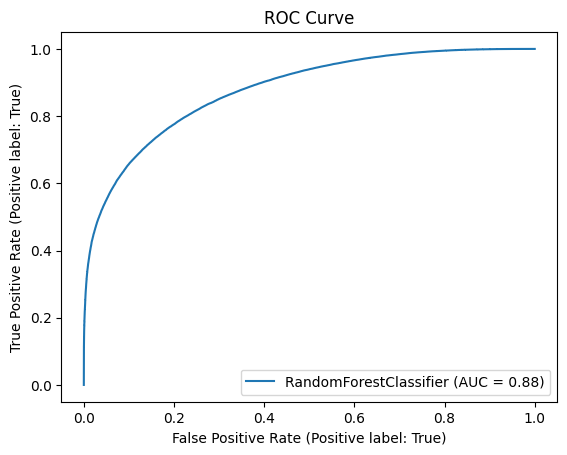

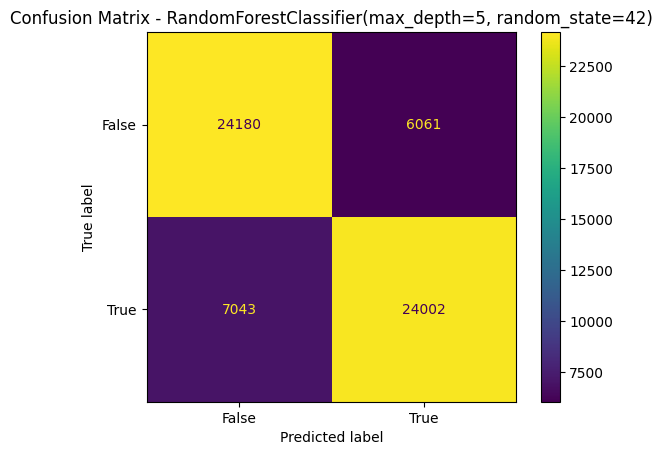

In [91]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay

for m in models.keys():
    clf = models.get(m)
    RocCurveDisplay.from_estimator(clf, X, y)
    plt.title('ROC Curve')
    plt.show()

    predictions = clf.predict(X_test)
    cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
    disp.plot()
    plt.title('Confusion Matrix - {}'.format(clf))
    plt.show()